In [24]:
from statistics import variance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [25]:
missing_values = ["n/a", "na", "--", " "]
customer_data= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=missing_values)

In [26]:
print(customer_data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [27]:
print(customer_data.shape)

(7043, 21)


In [28]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
print(customer_data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [30]:
print(customer_data.Churn.unique())

['No' 'Yes']


In [31]:
print(customer_data.Churn.value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [32]:
print(customer_data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


faltan valores en la columna TotalCharges

como el dataset es lo suficientemente grande es posible eliminar las filas con valores faltantes

In [33]:
customer_data=customer_data.dropna(axis=0)

convirtiendo variables categóricas en booleanas

In [34]:
dataset=customer_data.drop(['customerID'],  axis=1)

dataset['gender']=dataset['gender'].map({'Female':False, 'Male':True})

dataset['Partner']=dataset['Partner'].map({'No':False, 'Yes':True})

dataset['Dependents']=dataset['Dependents'].map({'No':False, 'Yes':True})

dataset['PhoneService']=dataset['PhoneService'].map({'No':False, 'Yes':True})

dataset['PaperlessBilling']=dataset['PaperlessBilling'].map({'No':False, 'Yes':True})

dataset['Churn']=dataset['Churn'].map({'No':False, 'Yes':True})

one-hot encoding columns

In [35]:
dataset=dataset.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], axis=1)

multipleLines=pd.get_dummies(customer_data.MultipleLines).iloc[:,1:]
multipleLines.rename(columns={'Yes':'MultipleLines'}, inplace=True)
multipleLines.rename(columns={'No phone service':'NoPhoneService'}, inplace=True)
multipleLines=multipleLines.drop(['NoPhoneService'], axis=1)

internetService=pd.get_dummies(customer_data.InternetService).iloc[:,1:]
internetService.rename(columns={'No':'NoInternetService'}, inplace=True)

onlineSecurity=pd.get_dummies(customer_data.OnlineSecurity).iloc[:,1:]
onlineSecurity.rename(columns={'Yes':'OnlineSecurity'}, inplace=True)

onlineBackup=pd.get_dummies(customer_data.OnlineBackup).iloc[:,1:]
onlineBackup.rename(columns={'Yes':'OnlineBackup'}, inplace=True)

#La columna No Internet service ya existe
onlineBackup=onlineBackup.drop(['No internet service'], axis=1)

deviceProtection=pd.get_dummies(customer_data.DeviceProtection).iloc[:,1:]
deviceProtection.rename(columns={'Yes':'DeviceProtection'}, inplace=True)

deviceProtection=deviceProtection.drop(['No internet service'], axis=1)

techSupport=pd.get_dummies(customer_data.TechSupport).iloc[:,1:]
techSupport.rename(columns={'Yes':'TechSupport'}, inplace=True)

techSupport=techSupport.drop(['No internet service'], axis=1)

streamingTV=pd.get_dummies(customer_data.StreamingTV).iloc[:,1:]
streamingTV.rename(columns={'Yes':'StreamingTV'}, inplace=True)

streamingTV=streamingTV.drop(['No internet service'], axis=1)

streamingMovies=pd.get_dummies(customer_data.StreamingMovies).iloc[:,1:]
streamingMovies.rename(columns={'Yes':'StreamingMovies'}, inplace=True)

streamingMovies=streamingMovies.drop(['No internet service'], axis=1)

contract=pd.get_dummies(customer_data.Contract)

paymentMethod=pd.get_dummies(customer_data.PaymentMethod)

volviendo a unir todas las columnas procesadas en un dataset

In [36]:
dataset = pd.concat([dataset,multipleLines,internetService, onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paymentMethod], axis=1)

<Axes: >

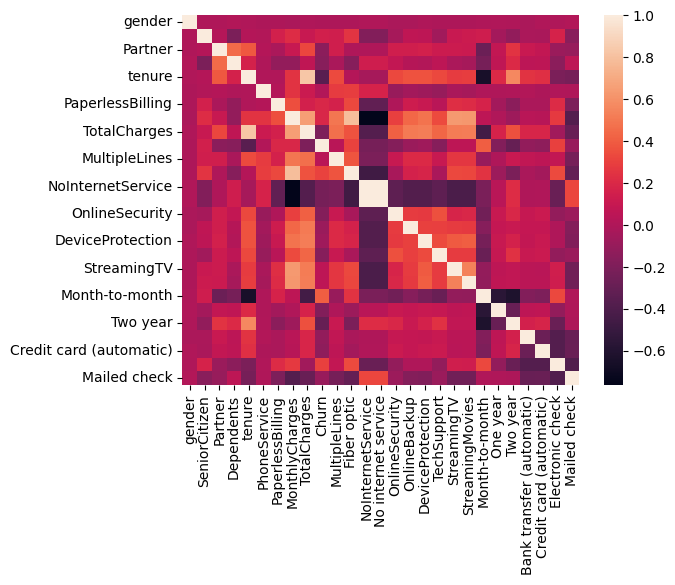

In [37]:
sns.heatmap(dataset.corr())

separando las variables independinte de la variable dependiente objetivo

In [38]:
X =  dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

separando los datos del entrenamiento de los de prueba

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, shuffle=False, stratify=None)

In [40]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

Logistical Regression

In [41]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=27, max_iter=200)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1026
        True       0.68      0.54      0.60       381

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

0.8052594171997157
[[927  99]
 [175 206]]
0.7220955933139938


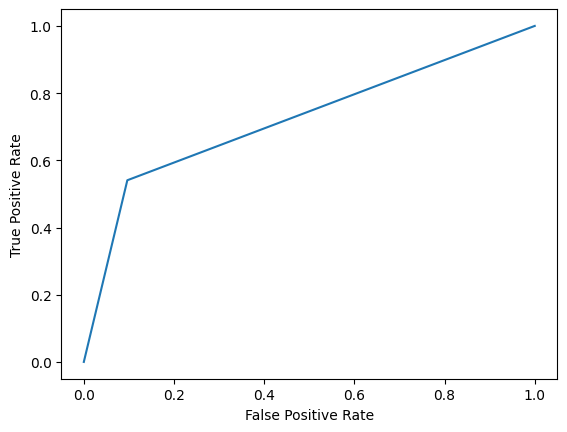

In [42]:
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1026
        True       0.66      0.50      0.57       381

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407

0.7938877043354655
[[926 100]
 [190 191]]
0.7019232245092171


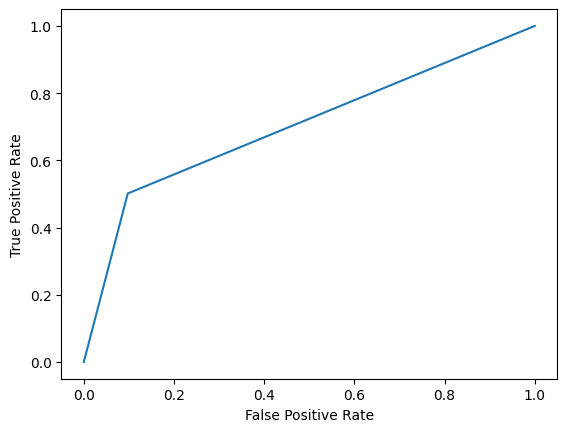

<Axes: >

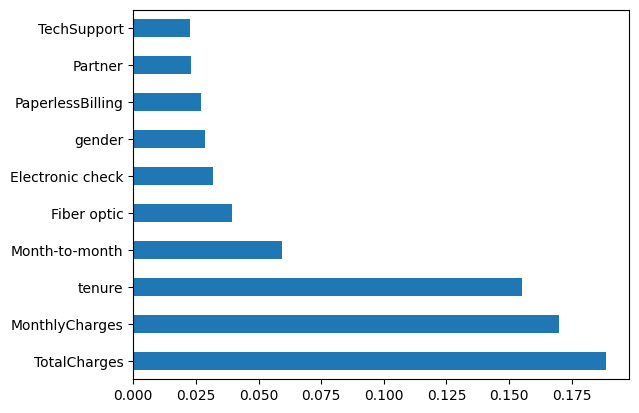

In [44]:
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

CategoriacalNB

In [45]:
from sklearn.naive_bayes import CategoricalNB
classifier=CategoricalNB()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

              precision    recall  f1-score   support

       False       0.87      0.77      0.82      1026
        True       0.53      0.70      0.60       381

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407

0.7505330490405118
[[788 238]
 [113 268]]
0.7357216312873172


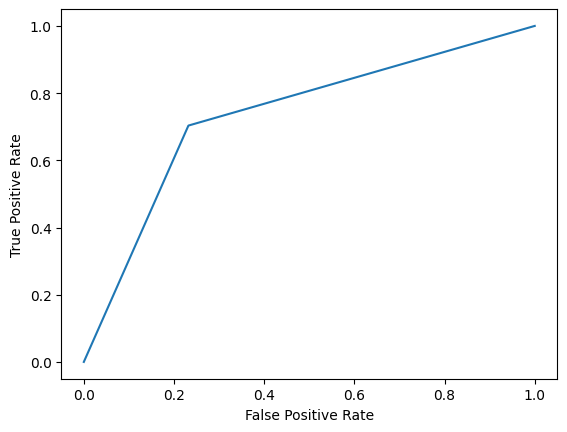

In [46]:
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

El modelo con los mejores resultados es el modelo de Regresión logística. Entregando buenos puntajes en F1, precisión y auc. Con una buena tasa de Verdaderos Negativos y Verdaderos Positivos y solo unos pocos Falsos Positivos.